<a href="https://colab.research.google.com/github/maurimendiluce/Clases-Mate2/blob/main/Interpolacion_por_polinomios_y_graficos.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Polinomios e interpolación de Lagrange

Para trabajar con polinomios e interpolación vamos a usar las funciones del paquete Numpy.
Principalmente: 
- `polyfit` (para calcular el polinomio interpolador)
- `polyval` (para evaluar un polinomio dado en uno o muchos puntos)



In [ ]:
import math
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
# Construimos el polinomio de grado 3 que interpola los puntos (1,2), (2,1), (3,7) y (4,8)
xi = np.array([1,2,3,4])   # Las coordenadas x de los puntos en los que queremos interpolar
yi = np.array([2,1,7,8])   # Las coordenadas y de los puntos en los que queremos interpolar
c = np.polyfit(xi,yi,3)    # El tercer parámetro es el grado del polinomio que buscamos
print(c)                   # El resultado es el vector de coeficientes del polinomio.
c

[ -2.   15.5 -33.5  22. ]


array([ -2. ,  15.5, -33.5,  22. ])

La salida de `polyfit` es el vector de coeficientes del polinomio, el primer elemento corresponde al término de grado mayor y el último término al monomio de grado 0. 

El paquete Numpy tiene también una clase de datos de tipo "polinomio", que permite operar fácilmente con polinomios.

El comando `poly1d` de Numpy convierte el vector de coeficientes a un dato de tipo "polinomio".

In [ ]:
p = np.poly1d(c)
print(p)                # Cuando hacemos print de un polinomio, podemos verlo en su representación usual.

    3        2
-2 x + 15.5 x - 33.5 x + 22


In [ ]:
p

poly1d([ -2. ,  15.5, -33.5,  22. ])

$x^3+x+2$

In [ ]:
p=np.poly1d(np.array([1,0,1,2]))
print(p)

   3
1 x + 1 x + 2


In [ ]:
# Verificamos que el polinomio obtenido interpola los valores dados.
# Usamos el comando polyval de numpy
print(np.polyval(p,1))
print(np.polyval(p,2))
print(np.polyval(p,3))

print("p(1) = ", p(1))  # Esto es lo mismo y más simple!

4
12
32
p(1) =  4


(el resultado es correcto, aunque con errores numéricos muy pequeños)

In [ ]:
# Podemos evaluar varios puntos a la vez
print(p(xi))

[ 4 12 32 70]


In [ ]:
# Podemos llamar a la función polyval tanto con polinomios como con el vector de coeficientes.
print(np.polyval(c,1))
print(np.polyval(c,xi))

2.0000000000000284
[2. 1. 7. 8.]


### Ejercicios:
- ¿Qué polinomio representa el vector `c1 = np.array([1, 0, 1])`? Verificar la respuesta convirtiendo el array a un polinomio `p1`usando la función `poly1d`, y luego imprimiendo (`print`) dicho polinomio.
- ¿Cuánto vale el polinomio `p1` en $x = 5$? Verificar la respuesta usando el comando `polyval` o directamente `p1(5)`.
- ¿Qué polinomio representa el vector `d1 = np.array([0, 1, 0, 1])`? ¿Y `d2 = np.array([1, 0, 1, 0])`?
- ¿Cómo se representa el polinomio $3x^3 + 2x - 5$ como array? Definir un array c2 como el vector de coeficientes, e imprimir su representación como polinomio usando la función `poly1d`.


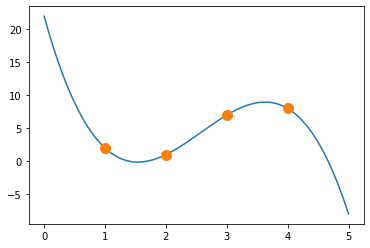

In [ ]:
# Para graficar el polinomio interpolador, aprovechamos que la función polyval podemos aplicarla a un array de números.

# Repetimos las definiciones anteriores
xi = np.array([1,2,3,4])   
yi = np.array([2,1,7,8])   
c = np.polyfit(xi,yi,3)    
p = np.poly1d(c)

x = np.linspace(0,5,100)       # 100 puntos equiespaciados en [0,5]
y = np.polyval(p, x)           # Evaluamos p en esos 100 puntos.
plt.plot(x,y)
plt.plot(xi,yi,'.', ms=20)     # La última opción ms (marker size) cambia el tamaño de los puntos

In [ ]:
# Puedo usar también la función polyfit con listas de Python
xi = [1,3,4,8]
yi = [2,3,2,10]
c = np.polyfit(xi,yi,3)
print(c)
np.polyval(c,xi)

[ 0.15714286 -1.75714286  5.48571429 -1.88571429]


array([ 2.,  3.,  2., 10.])

In [ ]:
# Pero en general vamos a usar arrays, porque con listas no puedo operar coordenada a coordenada
xi = np.array([1,3,4,8])
xi/4

array([0.25, 0.75, 1.  , 2.  ])